# WeRateDogs Data Wrangling project

## table of contents
<ul>
    <li><a href="#intro"> Introduction</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
<ul/>

<a id = 'intro'></a>
# Introduction
The tweet archive of WeRateDogs on Twitter is analyzed here. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog and it has over 4 million followers and has received international media coverage. Addithinal data such as retweet count and favorite count are obtained from Twitter's API. Predictions of breeds of dogs for each tweets are also provided.

<a id='wrangling'></a>
# Data Wrangling

3 data sets are gathered from different sources. They are assessed and cleaned here. Then, they are merged into a csv file.

In [1]:
# import modules
import pandas as pd
import numpy as np
import tweepy
import requests
import json
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set up twitter API


# authentification info
consumer_key = 'xxxxx'
consumer_secret = 'xxxxx'
access_token = 'xxxxx'
access_secret = 'xxxxx'

# authentification
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# access to twitter
api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# Gather
### First data set

In [3]:
# open a csv file on hand which shows twitter WeRateDogs archive data

df_archive=pd.read_csv("twitter-archive-enhanced.csv")

# Assess

In [4]:
# check data frame
df_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1073,739932936087216128,NaN,NaN,2016-06-06 21:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Rorie. She's zen af. Just enjoyin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739932936...,10,10,Rorie,None,None,None,None
1608,685641971164143616,NaN,NaN,2016-01-09 01:59:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Otis. He just passed a cop while going...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685641971...,7,10,Otis,None,None,pupper,None
1394,700002074055016451,NaN,NaN,2016-02-17 17:01:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Thumas. He covered himself in nanners ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700002074...,9,10,Thumas,None,None,None,None
1744,679158373988876288,NaN,NaN,2015-12-22 04:35:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rubio. He has too much skin. 11/10 htt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679158373...,11,10,Rubio,None,None,None,None
526,808838249661788160,NaN,NaN,2016-12-14 00:57:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ito. He'll be your uber driver tonight...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808838249...,13,10,Ito,None,None,None,None
487,814153002265309185,NaN,NaN,2016-12-28 16:56:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oshie. He's ready to party. Bought tha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/814153002...,12,10,Oshie,None,None,None,None
1431,697516214579523584,NaN,NaN,2016-02-10 20:23:19 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Say hello to Pherb. He does parkour. 9/10 http...,NaN,NaN,NaN,https://vine.co/v/i1LriMBmX6W,9,10,Pherb,None,None,None,None
1188,718454725339934721,NaN,NaN,2016-04-08 15:05:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pic is old but I hadn't seen it until tod...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718454725...,13,10,None,None,None,None,None
1701,680940246314430465,NaN,NaN,2015-12-27 02:36:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alice. She's an idiot. 4/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680940246...,4,10,Alice,None,None,None,None
1884,674800520222154752,NaN,NaN,2015-12-10 03:59:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tedders. He broke his leg saving babie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674800520...,11,10,Tedders,None,None,None,None


## column names - df_archive
- tweet_id: ID for each tweet
- in_reply_to_status_id: If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
- in_reply_to_user_id: If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID.
- timestamp: time of tweet
- source: Utility used to post the Tweet
- text: tweeted text
- retweeted_status_id: retweet ID
- retweeted_status_user_id: retweet user ID
- retweeted_status_timestamp: time of retweet
- expanded_urls: tweet urls
- rating_numerator: actual rating of a dog* it is normal to see above 10 'https://knowyourmeme.com/memes/theyre-good-dogs-brent
- rating_denominator: maximum rating points = 10
- name: name of dog
- doggo,floofer,pupper,puppo: dog stage


In [5]:
# some texts are not fully shown
df_archive.query('tweet_id=="666649482315059201"').expanded_urls

2316    https://twitter.com/dog_rates/status/666649482...
Name: expanded_urls, dtype: object

In [6]:
# expand column width to max
# http://songhuiming.github.io/pages/2017/04/02/jupyter-and-pandas-display/
pd.set_option('display.max_colwidth', -1)

In [7]:
# duplication check
df_archive[df_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [8]:
# check info
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
# check statistics
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
# check names
df_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

# df_archive
## Quality
- tweet id is integer --> string
- time stamp is string --> date 
- source column contains unnecessary words such as <>
- There are retweets data
- expanded_urls contains more than 1 url and missing value
- name cheks  
- rate checks 

## tidines
- in reply to status id and user_id are not both needed
- retweeted... are also not all needed
- dog stage should have only one column



# Gather
### Second data set

In [11]:
# get image-predicions.tsv from udacity server

r_prediction = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [12]:
# check if the request worked
r_prediction.status_code

200

In [13]:
# save the above tsv files in my file
with open("image_predictions.tsv",mode="wb") as file:
    file.write(r_prediction.content)


In [14]:
# open the tsv file as a data frame
df_prediction=pd.read_csv("image_predictions.tsv",sep="\t")

# Assess

In [15]:
# check the data
df_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1119,726224900189511680,https://pbs.twimg.com/media/ChQRsYaW0AETD7z.jpg,1,standard_poodle,0.261112,True,cocker_spaniel,0.094785,True,bucket,0.069946,False
1852,840632337062862849,https://pbs.twimg.com/media/C6qGphPV4AEKrdc.jpg,1,golden_retriever,0.711148,True,cocker_spaniel,0.157929,True,Labrador_retriever,0.059582,True
1111,724046343203856385,https://pbs.twimg.com/media/CgxUTS_XEAAC0pv.jpg,1,boxer,0.826272,True,bull_mastiff,0.158595,True,Great_Dane,0.011859,True
204,669753178989142016,https://pbs.twimg.com/media/CUtw9SAVEAAtFUN.jpg,1,Pembroke,0.858494,True,hamster,0.026319,False,Shetland_sheepdog,0.022405,True
889,699088579889332224,https://pbs.twimg.com/media/CbOpWswWEAE9kvX.jpg,1,mousetrap,0.456186,False,banded_gecko,0.258677,False,common_iguana,0.061783,False


## column names - df_prediction

- tweet_id: ID for each tweet
- jpg_url: image urls (1st image if several pictures are tweeted)
- img_num: number of image in a tweet
- p1,p2,p3: prediction of spieces/ num.1 prediction, num2 prediction, num3 prediction
- p1_conf,p2_conf,p3_conf: how confident the prediction is for each prediction
- p1_dog,p2_dog,p3_dog: if the prediction is dog or not


In [16]:
# info
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
# check what kind of breeds are predicted
df_prediction.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
malamute                     30 
cocker_spaniel               30 
French_bulldog               26 
miniature_pinscher           23 
Chesapeake_Bay_retriever     23 
seat_belt                    22 
Siberian_husky               20 
German_shepherd              20 
Staffordshire_bullterrier    20 
web_site                     19 
Cardigan                     19 
teddy                        18 
Maltese_dog                  18 
Shetland_sheepdog            18 
Eskimo_dog                   18 
beagle                       18 
Shih-Tzu                     17 
Lakeland_terrier             17 
Rottweiler                   17 
Italian_greyhound            16 
kuvasz                       16 
          

In [18]:
# check some observations which are predicted as web site
df_prediction[df_prediction["p1"]=="web_site"]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
94,667550882905632768,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,1,web_site,0.998258,False,dishwasher,0.000201,False,oscilloscope,0.000142,False
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
130,668291999406125056,https://pbs.twimg.com/media/CUZABzGW4AE5F0k.jpg,1,web_site,0.995535,False,skunk,0.001363,False,badger,0.000686,False
213,670040295598354432,https://pbs.twimg.com/media/CUx2F6lVEAAvFev.jpg,1,web_site,0.901552,False,borzoi,0.026660,True,Chihuahua,0.012438,True
270,670822709593571328,https://pbs.twimg.com/media/CU89schWIAIHQmA.jpg,1,web_site,0.993887,False,Chihuahua,0.001252,True,menu,0.000599,False
715,685547936038666240,https://pbs.twimg.com/media/CYOONfZW8AA7IOA.jpg,1,web_site,0.923987,False,oscilloscope,0.009712,False,hand-held_computer,0.008769,False
960,705786532653883392,https://pbs.twimg.com/media/Cct1G6vVAAI9ZjF.jpg,1,web_site,0.550294,False,Labrador_retriever,0.148496,True,golden_retriever,0.148482,True
1210,742465774154047488,https://pbs.twimg.com/media/Ck3EribXEAAPhZn.jpg,1,web_site,0.997154,False,comic_book,0.000439,False,desktop_computer,0.000268,False
1317,755206590534418437,https://pbs.twimg.com/media/CnsIT0WWcAAul8V.jpg,1,web_site,0.906673,False,printer,0.008600,False,carton,0.004533,False
1443,775729183532220416,https://pbs.twimg.com/media/CsPxk85XEAAeMQj.jpg,1,web_site,0.989407,False,hand-held_computer,0.002139,False,menu,0.002115,False


In [19]:
# check statistic
df_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
# check how many observations are at least predicted as a dog at once
df_prediction[df_prediction["p1_dog"] | df_prediction["p2_dog"] | df_prediction["p3_dog"]].tweet_id.count()

1751

> some pictures are not predicted as a dog at all

## Quality - df_prediction
- tweet_id data type from int to string
- There are pictures which are predicted as non-dogs

## tidiness
- it should only contain p, p_conf --> take the highest prediction with dog spieces for each observation

# Gather
### Third data set
> scrape data through twitter API

In [21]:
# save Json data into csv file for each tweets in the df_archive/https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
# create a dict of error id
error_ids={}

# count start time
start = time.time()
# create a file
with open ("tweet_json.txt", "w") as outfile:
    # loop through each tweet_id in the df_archieve
    for i in df_archive.tweet_id:
        try:
            tweet = api.get_status(i, tweet_mode="extended")
    
            # convert status structure to json
            json.dump(tweet._json, outfile)
            # create new line
            outfile.write("\n")
            
        except tweepy.TweepError as e:
            error_ids[i]=e
            
# count end time            
end = time.time()
# count how long it takes to run the loop
print(end-start)
# check error id
print(error_ids)


    
    

Rate limit reached. Sleeping for: 634
Rate limit reached. Sleeping for: 614


1980.2523744106293
{888202515573088257: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 873697596434513921: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 872668790621863937: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 869988702071779329: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 866816280283807744: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 861769973181624320: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 845459076796616705: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 842892208864923648: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 837012587749474308: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 827228250799742977: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 812747805718642688: TweepError([{'code': 144, 'mes

>some tweets are not accessible anymore

In [21]:
# create a list with retweet counts and favorite counts, then generate a dictionary
# https://stackoverflow.com/questions/28056171/how-to-build-and-fill-pandas-dataframe-from-for-loop/28058264#28058264
df_list = []

with open ("tweet_json.txt",encoding="utf-8") as file:
    
    # loop through texts
    for line in file:
       
        # change string json format
        json_file = json.loads(line)
        # get tweet id
        tweet_id = json_file["id"]
        # get retweet count
        retweet_count = json_file["retweet_count"]
        # get favorite count
        favorite_count = json_file["favorite_count"]
    

        df_list.append({"tweet_id":tweet_id,
                        "retweet_count":retweet_count,
                       "favorite_count":favorite_count})

# create a data frame
df_tweet_json = pd.DataFrame(df_list,columns=["tweet_id","retweet_count","favorite_count"])



# Assess

In [22]:
# check the data frame
df_tweet_json.sample(5)

,tweet_id,retweet_count,favorite_count
596,797971864723324932,3448,12466
1270,708469915515297792,870,3216
2119,670061506722140161,351,779
299,835574547218894849,3883,18663
1638,683462770029932544,713,2543


In [23]:
# check info
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


## Quality - df_tweet_json
- tweet_id data type from int to string

# Clean

In [24]:
# create copy data
df1_clean = df_archive.copy()
df2_clean = df_prediction.copy()
df3_clean = df_tweet_json.copy()

# missing data

## df1_clean

## Define
> expanded_urls column contains nan and it can be replaced with "https://twitter.com/dog_rates/status/" + own tweet_id

In [25]:
# set url for concatenating
url_front ="https://twitter.com/dog_rates/status/"

In [26]:
# if expanded urls col is na then add the defined url + tweet id for url
df1_clean.loc[df1_clean.expanded_urls.isna(),"expanded_urls"]=url_front + df1_clean["tweet_id"].map(str)

## Test

In [27]:
# check if na is gone
df1_clean[df1_clean.expanded_urls.isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## Define
> Original tweet should be included in this analysis. Therefore, retweets are removed from this data set.
Then retweet...columns are not required anymore.

In [28]:
# remove retweets from this data set
df1_clean = df1_clean[df1_clean["retweeted_status_id"].isna()]

In [29]:
# drop unrequired columns
df1_clean=df1_clean.drop(columns=["retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp"], axis=1)

In [30]:
# reset index
df1_clean.reset_index(inplace=True,drop=True)

## test

In [31]:
# check if unrequired columns are removed and number of observation is smaller
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2175 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 238.0+ KB


## Test

# Tidiness

## define
> in reply to status id and user_id are not both needed. Create a new column called replied and then remove the both columns

In [32]:
# first create a new column with the in reply to status id, then replace it with boolean
df1_clean["replied"] = df1_clean["in_reply_to_status_id"]
df1_clean["replied"] = df1_clean["replied"].notna()

In [33]:
# delete in reply to status id and user_id

df1_clean.drop(columns=["in_reply_to_status_id","in_reply_to_user_id"], axis=1, inplace=True)

## Test

In [34]:
# check if the replied column contains boolean
df1_clean.replied.value_counts()

False    2097
True     78  
Name: replied, dtype: int64

In [35]:
# check if "in_reply_to_status_id","in_reply_to_user_id" are removed from the data set
list(df1_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'replied']

## Define
> Dog stages columns exist more than one column. reshape the data frame so that it has only one column for a dog stage

In [36]:
# replace None with nan
df1_clean.replace("None",np.nan,inplace=True)

In [37]:
# replace nan with an empty space to concatnate strings
df1_clean[["doggo","floofer","pupper","puppo"]]=df1_clean[["doggo","floofer","pupper","puppo"]].fillna("")

In [38]:
# check the result
df1_clean.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,replied
556,787322443945877504,2016-10-15 16:01:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lincoln. He forgot to use his blinker when he changed lanes just now. Guilty as h*ck. Still 10/10 https://t.co/lsrR83SiVp,https://twitter.com/dog_rates/status/787322443945877504/photo/1,10,10,Lincoln,,,,,False


In [39]:
# concatnate dog stage columns to create a new column "stage"
df1_clean["stage"]=(df1_clean["doggo"] + df1_clean["floofer"] + df1_clean["pupper"] + df1_clean["puppo"])

In [40]:
# check unique stages
df1_clean.stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

> There are tweets with multiple dog stages. It needs to be solved.

In [41]:
# Handle multiple stages
df1_clean.loc[df1_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
df1_clean.loc[df1_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
df1_clean.loc[df1_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

# Handle missing values through change empty stages to na
df1_clean.loc[df1_clean.stage == '', 'stage'] = np.nan

In [42]:
# check the result
df1_clean[df1_clean["stage"].notna()].stage.unique()

array(['doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'doggo,floofer', 'doggo,pupper'], dtype=object)

In [43]:
# drop "doggo","floofer","pupper","puppo" columns
df1_clean.drop(columns=["doggo","floofer","pupper","puppo"],axis=1,inplace=True)

In [44]:
# reset index
df1_clean.reset_index(inplace=True,drop=True)

## Test

In [45]:
# check number of observations
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1495 non-null object
replied               2175 non-null bool
stage                 344 non-null object
dtypes: bool(1), int64(3), object(6)
memory usage: 155.1+ KB


In [46]:
# check data structure
df1_clean.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,replied,stage
2117,667070482143944705,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After much debate this dog is being upgraded to 10/10. I repeat 10/10,https://twitter.com/dog_rates/status/667070482143944705,10,10,NaN,True,NaN
1846,671882082306625538,2015-12-02 02:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Batdog. He's sleeping now but when he wakes up he'll fight crime and such. Great tongue. 11/10 for Batdog https://t.co/Clg16EVy9O,https://twitter.com/dog_rates/status/671882082306625538/photo/1,11,10,Batdog,False,NaN


In [47]:
# make pick up checks with the original data
df1_clean[df1_clean.tweet_id ==881536004380872706].stage

53    pupper
Name: stage, dtype: object

In [48]:
df_archive[df_archive.tweet_id ==881536004380872706].pupper

56    pupper
Name: pupper, dtype: object

## df2_clean

## Definition
> There are prediction 1,2 and 3 in this data set with non-dog breeds. Chose only a dog breed with the highest confidence each row. Tweets which are not predicted as a dog are set as missing value.

In [49]:
# check data
df2_clean.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
66,667176164155375616,https://pbs.twimg.com/media/CUJJLtWWsAE-go5.jpg,1,soft-coated_wheaten_terrier,0.318981,True,Lakeland_terrier,0.215218,True,toy_poodle,0.106014,True


In [50]:
# create new columns prediction and confidence
df2_clean["prediction"] = df2_clean["p1_dog"].map(str) + df2_clean["p2_dog"].map(str) + df2_clean["p3_dog"].map(str)
df2_clean["confidence"] = np.nan

In [51]:
# first prediction is true / confidence
df2_clean.loc[df2_clean.prediction == 'TrueTrueTrue', 'confidence'] = df2_clean.p1_conf
df2_clean.loc[df2_clean.prediction == 'TrueFalseTrue', 'confidence'] = df2_clean.p1_conf
df2_clean.loc[df2_clean.prediction == 'TrueTrueFalse', 'confidence'] = df2_clean.p1_conf
df2_clean.loc[df2_clean.prediction == 'TrueFalseFalse', 'confidence'] = df2_clean.p1_conf

# first prediction is true / prediction
df2_clean.loc[df2_clean.prediction == 'TrueTrueTrue', 'prediction'] = df2_clean.p1
df2_clean.loc[df2_clean.prediction == 'TrueFalseTrue', 'prediction'] = df2_clean.p1
df2_clean.loc[df2_clean.prediction == 'TrueTrueFalse', 'prediction'] = df2_clean.p1
df2_clean.loc[df2_clean.prediction == 'TrueFalseFalse', 'prediction'] = df2_clean.p1



# second prediction is true / confidence
df2_clean.loc[df2_clean.prediction == 'FalseTrueTrue', 'confidence'] = df2_clean.p2_conf
df2_clean.loc[df2_clean.prediction == 'FalseTrueFalse', 'confidence'] = df2_clean.p2_conf

# second prediction is true / prediction
df2_clean.loc[df2_clean.prediction == 'FalseTrueTrue', 'prediction'] = df2_clean.p2
df2_clean.loc[df2_clean.prediction == 'FalseTrueFalse', 'prediction'] = df2_clean.p2

# Third prediction is true / confidence
df2_clean.loc[df2_clean.prediction == 'FalseFalseTrue', 'confidence'] = df2_clean.p3_conf

# Third prediction is True / prediction
df2_clean.loc[df2_clean.prediction == 'FalseFalseTrue', 'prediction'] = df2_clean.p3


# no dog
df2_clean.loc[df2_clean.prediction == 'FalseFalseFalse', 'prediction'] = np.nan

In [52]:
# drop p1, p1_conf, p1_dog,p2, p2_conf, p2_dog,p3, p3_conf, p3_dog
df2_clean.drop(columns=["p1","p1_conf","p1_dog","p2","p2_conf","p2_dog","p3","p3_conf","p3_dog"],inplace=True,axis=1)

## Test

In [53]:
# check randomly
df2_clean.sample(30)

,tweet_id,jpg_url,img_num,prediction,confidence
1093,719704490224398336,https://pbs.twimg.com/media/CfznaXuUsAAH-py.jpg,1,NaN,NaN
1777,828381636999917570,https://pbs.twimg.com/media/C38Asz1WEAAvzj3.jpg,1,Bedlington_terrier,0.392535
767,689275259254616065,https://pbs.twimg.com/media/CZDMMY0WEAAQYjQ.jpg,1,American_Staffordshire_terrier,0.215161
576,678675843183484930,https://pbs.twimg.com/media/CWskEqnWUAAQZW_.jpg,1,NaN,NaN
44,666781792255496192,https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg,1,Italian_greyhound,0.618316
1928,858107933456039936,https://pbs.twimg.com/media/C-icm_WXUAAmuRR.jpg,1,golden_retriever,0.863874
547,677331501395156992,https://pbs.twimg.com/media/CWZdaGxXAAAjGjb.jpg,1,beagle,0.313464
1993,874012996292530176,https://pbs.twimg.com/media/DCEeLxjXsAAvNSM.jpg,2,Cardigan,0.806674
1384,765719909049503744,https://pbs.twimg.com/media/CqBiMAgWAAEJKgI.jpg,1,golden_retriever,0.969518
1677,813187593374461952,https://pbs.twimg.com/media/C0kFzOQUoAAt6yb.jpg,1,golden_retriever,0.888181


# Quality
## df1_clean

## Definition
>name and rating columns need to be revised. Therefore, create new columns name_check and rate check.

In [54]:
# get names from the text
# with Regex extract 2 types of name introduction
df1_clean[["a","b","c","d"]]=df1_clean.text.str.extract("(This is [A-Z][']?\w+)|(Meet [A-Z][']?\w+)|(Say hello to [A-Z][']?\w+)|(Here is [A-Z][']?\w+)")
# concatnate 2 columns a, b, c,d
df1_clean[["a","b","c","d"]] = df1_clean[["a","b","c","d"]].fillna("")
df1_clean["name_check"] = df1_clean["a"].map(str) + df1_clean["b"].map(str)+ df1_clean["c"].map(str)+df1_clean["d"].map(str)
# get only the last part which is name
df1_clean.name_check = df1_clean.name_check.str.split(" ").str[-1]
# drop a b column
df1_clean.drop(columns=["a","b","c","d"],axis=1,inplace=True)
df1_clean.reset_index(inplace=True,drop=True)
df1_clean.loc[df1_clean["name_check"]=="","name_check"] = np.nan

In [55]:
# get rate either int or float
df1_clean["rate_check"]=df1_clean.text.str.extract('((?:\d+\.)?\d+/\d{2,3})')
df1_clean.rate_check=df1_clean.rate_check.str.split("/").str[0]

In [56]:
# change data type
df1_clean[df1_clean.rate_check.isna()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,replied,stage,name_check,rate_check
429,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,False,NaN,Sam,NaN


In [57]:
# change nan to 0 as there is no rate
df1_clean.loc[df1_clean.rate_check.isna(),"rate_check"] = 0

In [58]:
# change data type
df1_clean.rate_check =df1_clean.rate_check.astype("float64")

In [59]:
# check data type
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1495 non-null object
replied               2175 non-null bool
stage                 344 non-null object
name_check            1391 non-null object
rate_check            2175 non-null float64
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 189.1+ KB


In [60]:
# replace nan with"" so that it can be compared
df1_clean[["name","name_check"]]=df1_clean[["name","name_check"]].fillna("")

In [61]:
# check inconcistent names
df1_clean[df1_clean.name != df1_clean.name_check].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'O', 'very',
       'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

>I will rewrite the name column with th check column. Then I will drop the name check column.

In [62]:
# copy name_check columns to name column
df1_clean["name"] = df1_clean.name_check

In [63]:
# check any differences
df1_clean[df1_clean.name != df1_clean.name_check].name.unique()

array([], dtype=object)

In [64]:
# drop name_check
df1_clean=df1_clean.drop("name_check",axis=1)


In [65]:
# replace "" with nan
df1_clean.name = df1_clean.name.replace("",np.nan)

In [66]:
# check na
df1_clean[df1_clean.name.isna()].sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,replied,stage,rate_check
117,866720684873056260,2017-05-22 18:21:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",He was providing for his family 13/10 how dare you https://t.co/Q8mVwWN3f4,https://twitter.com/nbcnews/status/866458718883467265,13,10,NaN,False,NaN,13.0
200,847617282490613760,2017-03-31 01:11:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",.@breaannanicolee PUPDATE: Cannon has a heart on his nose. Pupgraded to a 13/10,https://twitter.com/dog_rates/status/847617282490613760,13,10,NaN,True,NaN,13.0
1603,677687604918272002,2015-12-18 03:11:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This was Cindy's face when she heard Susan forgot the snacks for after the kid's soccer game. 11/10 https://t.co/gzkuVGRgAD,https://twitter.com/dog_rates/status/677687604918272002/photo/1,11,10,NaN,False,NaN,11.0
1409,686730991906516992,2016-01-12 02:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I just love this picture. 12/10 lovely af https://t.co/Kc84eFNhYU,https://twitter.com/dog_rates/status/686730991906516992/photo/1,12,10,NaN,False,NaN,12.0
348,822872901745569793,2017-01-21 18:26:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13,10,NaN,False,puppo,13.0
1332,691416866452082688,2016-01-25 00:26:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I present to you... Dog Jesus. 13/10 (he could be sitting on a rock but I doubt it) https://t.co/fR1P3g5I6k,https://twitter.com/dog_rates/status/691416866452082688/photo/1,13,10,NaN,False,NaN,13.0
1197,701805642395348998,2016-02-22 16:27:58 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Please pray for this pupper. Nothing wrong with her she just can't stop getting hit with banana peels. 11/10 https://t.co/8sdVenUAqr,https://vine.co/v/ivV6Y37mH5Z,11,10,NaN,False,pupper,11.0
1756,674008982932058114,2015-12-07 23:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pup is sad bc he didn't get to be the toy car. Also he has shitty money management skills. 10/10 still cute tho https://t.co/PiSXXZjDSJ,https://twitter.com/dog_rates/status/674008982932058114/photo/1,10,10,NaN,False,NaN,10.0
1311,692901601640583168,2016-01-29 02:46:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Fuck the system"" 10/10 https://t.co/N0OADmCnVV",https://twitter.com/dog_rates/status/692901601640583168/photo/1,10,10,NaN,False,NaN,10.0
434,809920764300447744,2016-12-17 00:38:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Please only send in dogs. We only rate dogs, not seemingly heartbroken ewoks. Thank you... still 10/10 would console https://t.co/HIraYS1Bzo",https://twitter.com/dog_rates/status/809920764300447744/photo/1,10,10,NaN,False,NaN,10.0


In [67]:
# fill na with name
df1_clean.loc[df1_clean.index==138,"name"] = "Boomer"

In [68]:
# check any differences in rates
df1_clean[df1_clean.rating_numerator != df1_clean.rate_check]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,replied,stage,rate_check
42,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,False,NaN,13.50
429,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,False,NaN,0.00
558,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,False,NaN,9.75
617,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,False,pupper,11.27
1510,681340665377193984,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,https://twitter.com/dog_rates/status/681340665377193984,5,10,NaN,True,NaN,9.50
1533,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,NaN,False,NaN,11.26
2154,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,NaN,False,NaN,9.00


In [69]:
# check rate_check with 0
df1_clean[df1_clean.rate_check==0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,replied,stage,rate_check
265,835152434251116546,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,NaN,False,NaN,0.0
429,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,False,NaN,0.0
840,746906459439529985,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,NaN,True,NaN,0.0


> some rating_denominator should be fixed too

In [70]:
# replace with figures from the text
df1_clean[df1_clean.rating_numerator != df1_clean.rate_check]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,replied,stage,rate_check
42,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,False,NaN,13.50
429,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,False,NaN,0.00
558,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,False,NaN,9.75
617,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,False,pupper,11.27
1510,681340665377193984,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,https://twitter.com/dog_rates/status/681340665377193984,5,10,NaN,True,NaN,9.50
1533,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,NaN,False,NaN,11.26
2154,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,NaN,False,NaN,9.00


In [71]:
# check
df1_clean.loc[df1_clean.rating_numerator != df1_clean.rate_check,"rating_denominator"]
df1_clean.loc[429,"rating_denominator"] = 0

In [72]:
# replace data
df1_clean.loc[df1_clean.rating_numerator != df1_clean.rate_check,"rating_numerator"] =df1_clean.loc[df1_clean.rating_numerator != df1_clean.rate_check,"rate_check"]

In [73]:
# check results
df1_clean.loc[df1_clean.rating_numerator != df1_clean.rate_check,"rating_numerator"]

Series([], Name: rating_numerator, dtype: float64)

In [74]:
# drop rate_check
df1_clean=df1_clean.drop("rate_check",axis=True)

## Test

In [75]:
#check results
df1_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,replied,stage
2006,668986018524233728,2015-11-24 02:54:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ruby. She's a Bimmington Fettuccini. One ear works a lil better than other. Looks startled. Cool carpet 9/10 https://t.co/j0Wpa42KCH,https://twitter.com/dog_rates/status/668986018524233728/photo/1,9.0,10,Ruby,False,NaN
1005,718939241951195136,2016-04-09 23:10:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Otis. Everybody look at Otis. 12/10 would probably faint while petting https://t.co/I9qoe1uEih,https://twitter.com/dog_rates/status/718939241951195136/photo/1,12.0,10,Otis,False,NaN
675,767884188863397888,2016-08-23 00:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tito. He's on the lookout. Nobody knows for what. 10/10 https://t.co/Qai481H6RA,"https://twitter.com/dog_rates/status/767884188863397888/photo/1,https://twitter.com/dog_rates/status/767884188863397888/photo/1,https://twitter.com/dog_rates/status/767884188863397888/photo/1,https://twitter.com/dog_rates/status/767884188863397888/photo/1",10.0,10,Tito,False,NaN
420,812709060537683968,2016-12-24 17:18:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Brandi and Harley. They are practicing their caroling for later. Both 12/10 festive af https://t.co/AbBDuGZUpp,https://twitter.com/dog_rates/status/812709060537683968/photo/1,12.0,10,Brandi,False,NaN
1347,690374419777196032,2016-01-22 03:24:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phred. He's an Albanian Flepperkush. Tongue is rather impressive if I'm honest. Perhaps even legendary 11/10 https://t.co/VpfFCKE28C,https://twitter.com/dog_rates/status/690374419777196032/photo/1,11.0,10,Phred,False,NaN


In [76]:
# correct rates
df1_clean.loc[1024,"rating_numerator"] = 11
df1_clean.loc[1024,"rating_denominator"] = 10

In [77]:
# check specific index
df1_clean[df1_clean.index==2154]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,replied,stage
2154,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9.0,2,NaN,False,NaN


In [78]:
# correct
df1_clean.loc[2154,"rating_denominator"] = 10

In [79]:
# check specific index
df1_clean[df1_clean.index==1024]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,replied,stage
1024,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11.0,10,Bluebert,False,NaN


In [80]:
# check specific index
df1_clean[df1_clean.index==429]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,replied,stage
429,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",0.0,0,Sam,False,NaN


In [81]:
# info
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null int64
name                  1392 non-null object
replied               2175 non-null bool
stage                 344 non-null object
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 155.1+ KB


In [82]:
# describe
df1_clean.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.175000e+03,2175.000000,2175.000000
mean,7.371205e+17,13.151853,10.474943
std,6.748668e+16,47.698209,6.968598
min,6.660209e+17,0.000000,0.000000
25%,6.768432e+17,10.000000,10.000000
50%,7.098528e+17,11.000000,10.000000
75%,7.894226e+17,12.000000,10.000000
max,8.924206e+17,1776.000000,170.000000


In [83]:
# check bigger figures
df1_clean[df1_clean.rating_numerator>1000]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,replied,stage
804,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10,Atticus,False,NaN


In [84]:
# check bigger figures
df1_clean[df1_clean.rating_denominator>100]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,replied,stage
733,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165.0,150,NaN,False,NaN
942,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204.0,170,NaN,False,NaN
1455,684225744407494656,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3","https://twitter.com/dog_rates/status/684225744407494656/photo/1,https://twitter.com/dog_rates/status/684225744407494656/photo/1",143.0,130,NaN,True,NaN
1456,684222868335505415,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,https://twitter.com/dog_rates/status/684222868335505415/photo/1,121.0,110,NaN,False,NaN
1600,677716515794329600,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,https://twitter.com/dog_rates/status/677716515794329600/photo/1,144.0,120,NaN,False,NaN


In [85]:
# create a new column to minimize irregular ratings
df1_clean["rating_impact"]=round((df1_clean.rating_numerator/df1_clean.rating_denominator),2)

In [86]:
# check
df1_clean.rating_impact.sort_values()

265     0.000000  
840     0.000000  
1690    0.100000  
2080    0.100000  
1267    0.100000  
2157    0.100000  
1859    0.100000  
1761    0.100000  
1912    0.100000  
1419    0.200000  
2129    0.200000  
2067    0.200000  
2058    0.200000  
987     0.200000  
1900    0.200000  
1585    0.200000  
1741    0.200000  
2168    0.200000  
1582    0.200000  
2145    0.200000  
1749    0.300000  
1227    0.300000  
1011    0.300000  
2124    0.300000  
1719    0.300000  
618     0.300000  
1768    0.300000  
2060    0.300000  
1299    0.300000  
2023    0.300000  
          ...     
70      1.400000  
507     1.400000  
161     1.400000  
160     1.400000  
159     1.400000  
61      1.400000  
341     1.400000  
33      1.400000  
180     1.400000  
313     1.400000  
1426    1.400000  
53      1.400000  
310     1.400000  
529     1.400000  
753     1.400000  
183     1.400000  
875     1.400000  
352     1.400000  
38      1.400000  
334     1.400000  
291     1.400000  
247     1.50

> index 263 and 429 have some problems

In [87]:
# check index 263
df1_clean[df1_clean.index==263]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,replied,stage,rating_impact
263,835246439529840640,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",https://twitter.com/dog_rates/status/835246439529840640,960.0,0,NaN,True,NaN,inf


In [88]:
# change ratings
df1_clean.loc[df1_clean.index==263,"rating_numerator"] = 13
df1_clean.loc[df1_clean.index==263,"rating_denominator"] = 10
df1_clean.loc[df1_clean.index==263,"rating_impact"] = round((13/10),2)

In [89]:
#check index 263
df1_clean[df1_clean.index==263]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,replied,stage,rating_impact
263,835246439529840640,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",https://twitter.com/dog_rates/status/835246439529840640,13.0,10,NaN,True,NaN,1.3


In [90]:
#check index 429
df1_clean[df1_clean.index==429]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,replied,stage,rating_impact
429,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",0.0,0,Sam,False,NaN,NaN


In [91]:
# 0/0 should be 0
df1_clean.loc[df1_clean.index==429,"rating_impact"] = 0

In [92]:
#check index 429
df1_clean[df1_clean.index==429]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,replied,stage,rating_impact
429,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",0.0,0,Sam,False,NaN,0.0


In [93]:
# check
df1_clean.rating_impact.unique()

array([1.300e+00, 1.200e+00, 1.400e+00, 1.350e+00, 1.700e+00, 1.100e+00,
       1.000e+00, 4.200e+01, 6.660e+01, 6.000e-01, 1.820e+01, 1.500e+00,
       0.000e+00, 7.300e-01, 7.000e-01, 9.800e-01, 5.000e-01, 1.130e+00,
       3.000e-01, 8.000e-01, 9.000e-01, 4.000e-01, 1.776e+02, 8.200e-01,
       2.000e-01, 1.000e-01, 6.400e-01, 1.250e+00, 9.500e-01])


## Definition

>tweet id should be string & timestamp should be date type.

In [94]:
# change data types
df1_clean.tweet_id =df1_clean.tweet_id.astype(str)
df1_clean.timestamp =pd.to_datetime(df1_clean.timestamp)

# Test

In [95]:
# check
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null int64
name                  1392 non-null object
replied               2175 non-null bool
stage                 344 non-null object
rating_impact         2175 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 172.1+ KB


## Definition
> Source columns include unecesarry parts. extract only useful infomation.

In [96]:
# check key words
df1_clean.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [97]:
# exract key words
df1_clean.source=df1_clean.source.str.extract("(>.*<)")

# remove some character
df1_clean.source=df1_clean.source.str.replace(">","")
df1_clean.source=df1_clean.source.str.replace("<","")

## Test

In [98]:
# check
df1_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

## Define
> expanded urls colun contains more than 1 url. extract only 1 url.

In [99]:
# check urls which contains more than 2 urls
df1_clean[df1_clean.expanded_urls.str.split(",").str.len()>1]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,replied,stage,rating_impact
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,False,NaN,1.20
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10,Jax,False,NaN,1.30
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10,NaN,False,NaN,1.30
10,890006608113172480,2017-07-26 00:31:25,Twitter for iPhone,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,"https://twitter.com/dog_rates/status/890006608113172480/photo/1,https://twitter.com/dog_rates/status/890006608113172480/photo/1",13.0,10,Koda,False,NaN,1.30
13,889638837579907072,2017-07-25 00:10:02,Twitter for iPhone,This is Ted. He does his best. Sometimes that's not enough. But it's ok. 12/10 would assist https://t.co/f8dEDcrKSR,"https://twitter.com/dog_rates/status/889638837579907072/photo/1,https://twitter.com/dog_rates/status/889638837579907072/photo/1",12.0,10,Ted,False,NaN,1.20
17,888804989199671297,2017-07-22 16:56:37,Twitter for iPhone,This is Zeke. He has a new stick. Very proud of it. Would like you to throw it for him without taking it. 13/10 would do my best https://t.co/HTQ77yNQ5K,"https://twitter.com/dog_rates/status/888804989199671297/photo/1,https://twitter.com/dog_rates/status/888804989199671297/photo/1",13.0,10,Zeke,False,NaN,1.30
18,888554962724278272,2017-07-22 00:23:06,Twitter for iPhone,This is Ralphus. He's powering up. Attempting maximum borkdrive. 13/10 inspirational af https://t.co/YnYAFCTTiK,"https://twitter.com/dog_rates/status/888554962724278272/photo/1,https://twitter.com/dog_rates/status/888554962724278272/photo/1,https://twitter.com/dog_rates/status/888554962724278272/photo/1,https://twitter.com/dog_rates/status/888554962724278272/photo/1",13.0,10,Ralphus,False,NaN,1.30
19,888078434458587136,2017-07-20 16:49:33,Twitter for iPhone,This is Gerald. He was just told he didn't get the job he interviewed for. A h*ckin injustice. 12/10 didn't want the job anyway https://t.co/DK7iDPfuRX,"https://twitter.com/dog_rates/status/888078434458587136/photo/1,https://twitter.com/dog_rates/status/888078434458587136/photo/1",12.0,10,Gerald,False,NaN,1.20
22,887473957103951883,2017-07-19 00:47:34,Twitter for iPhone,This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13.0,10,Canela,False,NaN,1.30
25,886983233522544640,2017-07-17 16:17:36,Twitter for iPhone,This is Maya. She's very shy. Rarely leaves her cup. 13/10 would find her an environment to thrive in https://t.co/I6oNy0CgiT,"https://twitter.com/dog_rates/status/886983233522544640/photo/1,https://twitter.com/dog_rates/status/886983233522544640/photo/1",13.0,10,Maya,False,NaN,1.30


> the first url contains some irrelevant info such as https://www.gofundme.com/mingusneedsus. Therefore, I will take the second url.

In [100]:
# get the second url if there is more than 2 urls
df1_clean.loc[df1_clean.expanded_urls.str.split(",").str.len()>1,"expanded_urls"] = df1_clean.expanded_urls.str.split(",").str[1]

## Test

In [101]:
# check
df1_clean[df1_clean.expanded_urls.str.split(",").str.len()>1]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,replied,stage,rating_impact


In [102]:
# check
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null int64
name                  1392 non-null object
replied               2175 non-null bool
stage                 344 non-null object
rating_impact         2175 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 172.1+ KB


## df2_clean

## Definition
>tweet id should be string data type and prediction to be categorical

In [103]:
# info
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
img_num       2075 non-null int64
prediction    1751 non-null object
confidence    1751 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.1+ KB


In [104]:
# change data types
df2_clean.tweet_id = df2_clean.tweet_id.astype(str)
df2_clean.prediction = df2_clean.prediction.astype('category')

## Test

In [105]:
# info
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id      2075 non-null object
jpg_url       2075 non-null object
img_num       2075 non-null int64
prediction    1751 non-null category
confidence    1751 non-null float64
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 72.8+ KB


## Definition
> remove observations which are predicted as non-dog.

In [106]:
# drop rows if prediction is nan
df2_clean=df2_clean.dropna(subset=["prediction"])

## Test

In [107]:
# check if number is lower
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id      1751 non-null object
jpg_url       1751 non-null object
img_num       1751 non-null int64
prediction    1751 non-null category
confidence    1751 non-null float64
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 76.0+ KB


## Definition:
>Capitalize dog breeds name.

In [108]:
# capitalize
df2_clean.prediction = df2_clean.prediction.str.capitalize()

## Test

In [109]:
df2_clean.prediction.unique()

array(['Welsh_springer_spaniel', 'Redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'Miniature_pinscher',
       'Bernese_mountain_dog', 'Chow', 'Golden_retriever',
       'Miniature_poodle', 'Gordon_setter', 'Walker_hound', 'Pug',
       'Bloodhound', 'Lhasa', 'English_setter', 'Italian_greyhound',
       'Maltese_dog', 'Newfoundland', 'Malamute',
       'Soft-coated_wheaten_terrier', 'Chihuahua',
       'Black-and-tan_coonhound', 'Toy_terrier', 'Blenheim_spaniel',
       'Pembroke', 'Irish_terrier', 'Chesapeake_bay_retriever',
       'Curly-coated_retriever', 'Dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'Miniature_schnauzer',
       'Airedale', 'Rottweiler', 'West_highland_white_terrier',
       'Toy_poodle', 'Giant_schnauzer', 'Vizsla', 'Siberian_husky',
       'Papillon', 'Saint_bernard', 'Tibetan_terrier', 'Borzoi', 'Beagle',
       'Yorkshire_terrier', 'Pomeranian', 'Kuvasz',
       'Flat-coated_retriever', 'Norwegian_elkhound', 'Boxer',
   

## df3_clean

## Definition
> tweet_id should be str.

In [110]:
# info
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [111]:
# change it to str
df3_clean.tweet_id = df3_clean.tweet_id.astype(str)

## Test

In [112]:
# info
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null object
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


## Merge data sets

In [113]:
# merge df1 and df2
df_temp = df1_clean.merge(df2_clean, on="tweet_id", how="inner")

In [114]:
# merge the 3rd df
twitter_archive_master = df_temp.merge(df3_clean, on="tweet_id", how="left")

In [115]:
# check
twitter_archive_master.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,replied,stage,rating_impact,jpg_url,img_num,prediction,confidence,retweet_count,favorite_count
1304,675853064436391936,2015-12-13 01:41:41,Twitter for iPhone,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,https://twitter.com/dog_rates/status/675853064436391936/photo/1,88.0,80,NaN,False,NaN,1.1,https://pbs.twimg.com/media/CWEcxqWVEAAHyGH.jpg,1,Labrador_retriever,0.868367,1361.0,2772.0


In [116]:
# save as twitter_archive_master.csv
twitter_archive_master.to_csv("twitter_archive_master.csv",index=False)

In [117]:
# check the csv above is saved
os.listdir()

['.ipynb_checkpoints',
 'act_report.html',
 'act_report.ipynb',
 'dog_breeds_prediction.png',
 'favorite_count_retweet_count.png',
 'image_predictions.tsv',
 'tweet_frequency_overtime.png',
 'tweet_json.txt',
 'twitter-archive-enhanced.csv',
 'twitter_archive_master.csv',
 'video_pic.PNG',
 'wrangle_act.ipynb',
 'wrangle_report.html',
 'wrangle_report.ipynb']

# <a id='eda'></a>
# Exploratory Data Analysis

>Here some data are visualized.

In [118]:
# read csv
df = pd.read_csv("twitter_archive_master.csv")

In [119]:
# check data set
df.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,replied,stage,rating_impact,jpg_url,img_num,prediction,confidence,retweet_count,favorite_count
1266,677328882937298944,2015-12-17 03:26:04,Twitter for iPhone,This is Derek. All the dogs adore Derek. He's a great guy. 10/10 really solid pup https://t.co/KgcsGNb61s,https://twitter.com/dog_rates/status/677328882937298944/photo/1,10.0,10,Derek,False,NaN,1.0,https://pbs.twimg.com/media/CWZbBlAUsAAjRg5.jpg,1,Kelpie,0.029054,1582.0,3767.0


In [120]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 17 columns):
tweet_id              1686 non-null int64
timestamp             1686 non-null object
source                1686 non-null object
text                  1686 non-null object
expanded_urls         1686 non-null object
rating_numerator      1686 non-null float64
rating_denominator    1686 non-null int64
name                  1188 non-null object
replied               1686 non-null bool
stage                 260 non-null object
rating_impact         1686 non-null float64
jpg_url               1686 non-null object
img_num               1686 non-null int64
prediction            1686 non-null object
confidence            1686 non-null float64
retweet_count         1684 non-null float64
favorite_count        1684 non-null float64
dtypes: bool(1), float64(5), int64(3), object(8)
memory usage: 212.5+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DC525AC080>,
      dtype=object)

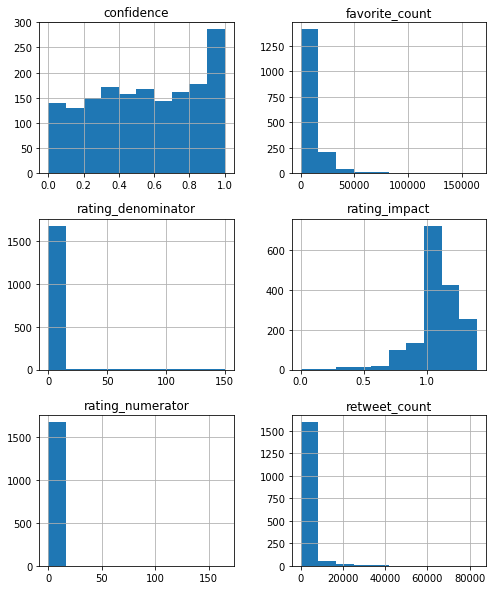

In [121]:
# check histogram of some numerical value
df[[
 'timestamp',
 'rating_numerator',
 'rating_denominator',
 'rating_impact',
 'confidence',
 'retweet_count',
 'favorite_count']].hist(figsize=(8,10))

Text(0.5, 1.0, 'A number of predicted dog breeds')

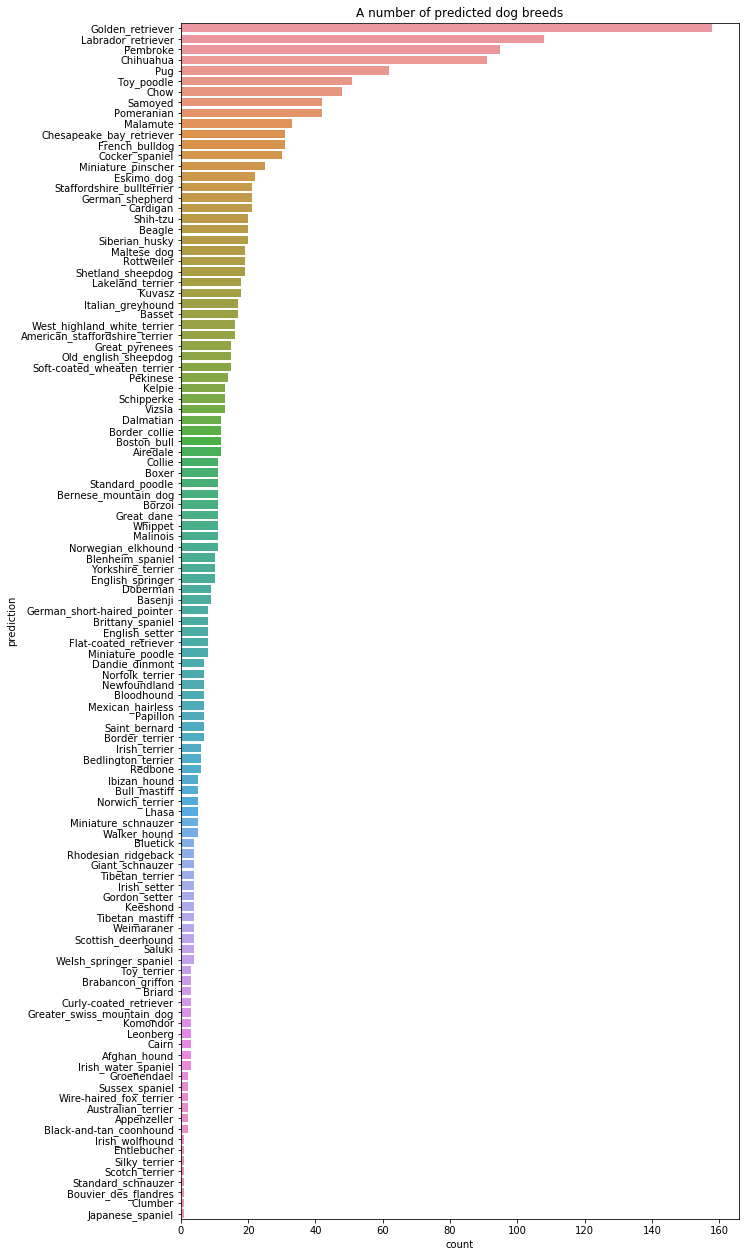

In [122]:
# check which dog breeds are most frequently tweeted
f, ax = plt.subplots(figsize=(10, 22))
order = df['prediction'].value_counts().index
sns.countplot(data=df,y="prediction",order=order)
plt.title("A number of predicted dog breeds")

In [123]:
# create a new df to check a number of tweets over time
time_tweet = df[["tweet_id","timestamp","retweet_count","favorite_count"]].copy()
time_tweet["time"] = pd.to_datetime(df["timestamp"]).dt.to_period("M")
time_tweet = time_tweet.drop("timestamp",axis=1)

Text(0.5, 0, 'tweet time stamp')

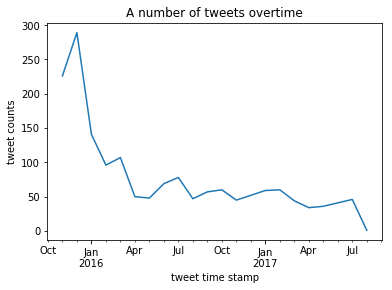

In [124]:
# check number of tweet count overtime
tweet_count = time_tweet.groupby("time").count().tweet_id
# plot
tweet_count.plot()
plt.title("A number of tweets overtime")
plt.ylabel("tweet counts")
plt.xlabel("tweet time stamp")


Text(0.5, 0, 'tweet time stamp')

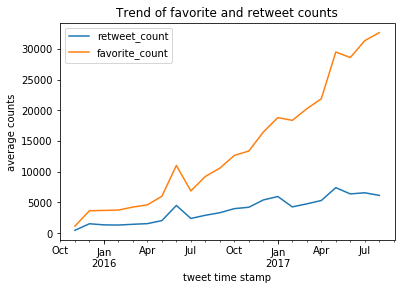

In [125]:
# check favorite and retweet trends
retweet_count = time_tweet.groupby("time").mean().retweet_count
fav_count = time_tweet.groupby("time").mean().favorite_count

# plot
retweet_count.plot()
fav_count.plot()
plt.legend()
plt.title("Trend of favorite and retweet counts")
plt.ylabel("average counts")
plt.xlabel("tweet time stamp")

In [126]:
# check if there is any difference between video and photo tweets
tweet_type = df.copy()
tweet_type["type"]=df.expanded_urls.str.split("/").str[-2]


In [127]:
# check any error
tweet_type.type.isna().sum()

0

In [128]:
# show average score
tweet_type.groupby("type").mean()

,tweet_id,rating_numerator,rating_denominator,replied,rating_impact,img_num,confidence,retweet_count,favorite_count
type,,,,,,,,,
photo,7.382857e+17,11.273317,10.442673,0.011649,1.078204,1.223176,0.554166,2441.293432,8538.424187
video,7.684893e+17,14.836364,12.545455,0.018182,1.203636,1.000000,0.424477,10293.818182,24273.618182


In [129]:
# show counts
tweet_type.groupby("type").count().tweet_id

type
photo    1631
video    55  
Name: tweet_id, dtype: int64

 <a id='conclusions'></a>
# Conclusions

- Most frequentry tweeted dog breeds are Golden retriever and Labrador retriever according to the image prediction.
- Even though a number of tweet declines over time, retweets - and favorite counts increase which shows more user interactions.
- Video tweets have a higher average retweet_count, favorite_count and rating_impact.

>Limitation: The image prediction is not perfect. Furthermore, not all the ratings and name may not be correctly assigned.<p></p>

>References:https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
